In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_DIR = "./"  # 현재 주피터 노트북 기준
train_path = os.path.join(BASE_DIR, "train.parquet")
test_path = os.path.join(BASE_DIR, "test.parquet")
sample_path = os.path.join(BASE_DIR, "sample_submission.csv")

In [4]:
# Parquet 파일 로드 
train = pd.read_parquet(train_path)
test = pd.read_parquet(test_path)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

# 상위 5행 미리보기
train.head()


Train shape: (10704179, 119)
Test shape: (1527298, 119)


,gender,age_group,inventory_id,day_of_week,hour,seq,l_feat_1,l_feat_2,l_feat_3,l_feat_4,...,history_b_22,history_b_23,history_b_24,history_b_25,history_b_26,history_b_27,history_b_28,history_b_29,history_b_30,clicked
0,1.0,7.0,36,5,13,"9,18,269,516,57,97,527,74,317,311,269,479,57,7...",1.0,2.0,1.0,23.0,...,0.070092,0.070092,0.011682,0.004673,0.087226,0.049843,0.015576,0.040498,0.051401,0
1,1.0,7.0,2,5,08,"9,144,269,57,516,97,527,74,315,317,311,269,479...",2.0,2.0,3.0,17.0,...,0.072990,0.072990,0.012165,0.004866,0.045416,0.051904,0.016220,0.042172,0.026763,0
2,1.0,7.0,36,5,11,"269,516,57,97,165,527,74,77,317,269,75,450,15,...",1.0,2.0,1.0,7.0,...,0.057177,0.057177,0.009530,0.003812,0.035577,0.081318,0.012706,0.033036,0.062898,0
3,1.0,8.0,37,5,11,"269,57,516,21,214,269,561,214,269,561,247,516,...",2.0,2.0,2.0,7.0,...,0.100449,0.100449,0.016741,0.006697,0.062502,0.071430,0.022322,0.058037,0.073659,0
4,2.0,7.0,37,5,07,"144,269,57,516,35,479,57,516,527,74,77,318,193...",2.0,2.0,3.0,24.0,...,0.064512,0.064512,0.010752,0.004301,0.040141,0.045875,0.014336,0.037274,0.023654,0


In [5]:
# 컬럼별 데이터 타입 및 결측치 확인
train.info()
train.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704179 entries, 0 to 10704178
Columns: 119 entries, gender to clicked
dtypes: float32(112), int32(1), object(6)
memory usage: 5.0+ GB


feat_e_3     1085557
feat_a_3       18598
feat_a_4       18598
feat_a_5       18598
feat_a_6       18598
feat_a_18      18598
feat_a_17      18598
feat_a_9       18598
feat_a_10      18598
feat_a_11      18598
dtype: int64

In [6]:
# 기본 통계 확인
train.describe(include="all").T.head(15)

# 중복 데이터 확인 및 제거
dup_count = train.duplicated().sum()
print(f"중복 행 수: {dup_count}")
if dup_count > 0:
    train = train.drop_duplicates().reset_index(drop=True)
    print("중복 제거 완료!")

중복 행 수: 11
중복 제거 완료!


In [7]:

missing_ratio = (
    train.isnull().sum()
    .div(len(train))
    .sort_values(ascending=False)
)
missing_ratio[missing_ratio > 0].head(20)


feat_e_3     0.101414
feat_a_3     0.001736
feat_a_4     0.001736
feat_a_5     0.001736
feat_a_6     0.001736
feat_a_18    0.001736
feat_a_17    0.001736
feat_a_9     0.001736
feat_a_10    0.001736
feat_a_11    0.001736
feat_a_12    0.001736
feat_a_13    0.001736
feat_a_14    0.001736
feat_a_15    0.001736
feat_a_16    0.001736
feat_a_1     0.001736
feat_a_2     0.001736
feat_a_7     0.001736
feat_a_8     0.001736
l_feat_8     0.001607
dtype: float64

In [8]:
train.groupby('gender')['feat_e_3'].apply(lambda x: x.isnull().mean())
train.groupby('age_group')['feat_e_3'].apply(lambda x: x.isnull().mean())

age_group
1.0    0.000000
2.0    0.034075
3.0    0.056476
4.0    0.080324
5.0    0.092947
6.0    0.114788
7.0    0.095104
8.0    0.119544
Name: feat_e_3, dtype: float64

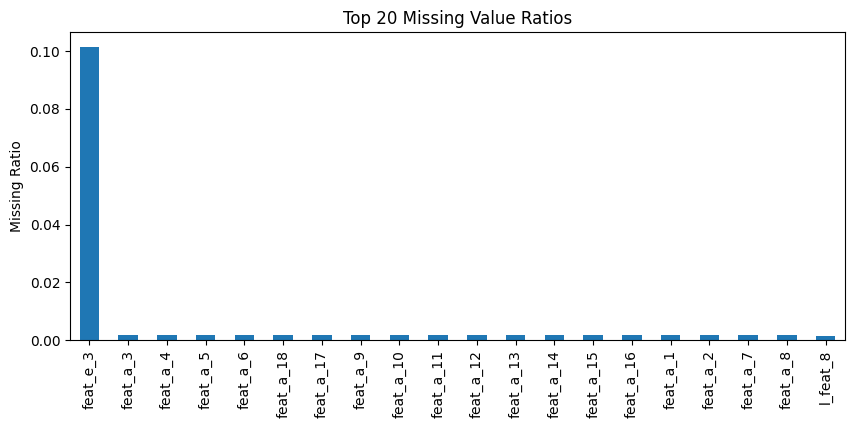

In [9]:
import matplotlib.pyplot as plt

missing_ratio.sort_values(ascending=False).head(20).plot(
    kind='bar', figsize=(10, 4), title='Top 20 Missing Value Ratios'
)
plt.ylabel('Missing Ratio')
plt.show()

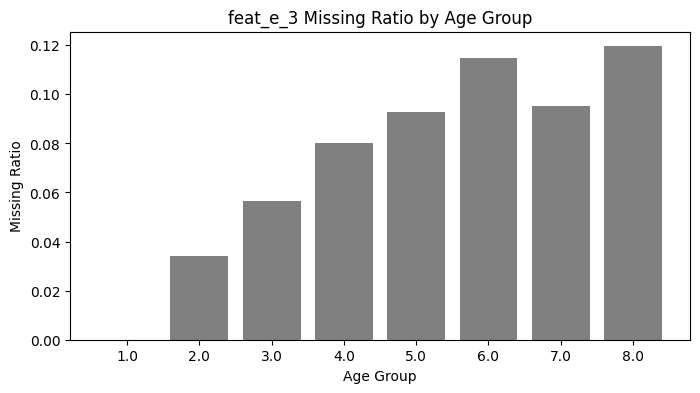

In [10]:
age_missing = (
    train.groupby('age_group')['feat_e_3']
    .apply(lambda x: x.isnull().mean())
    .reset_index()
)

plt.figure(figsize=(8, 4))
plt.bar(age_missing['age_group'], age_missing['feat_e_3'], color='gray')
plt.title('feat_e_3 Missing Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Missing Ratio')
plt.show()


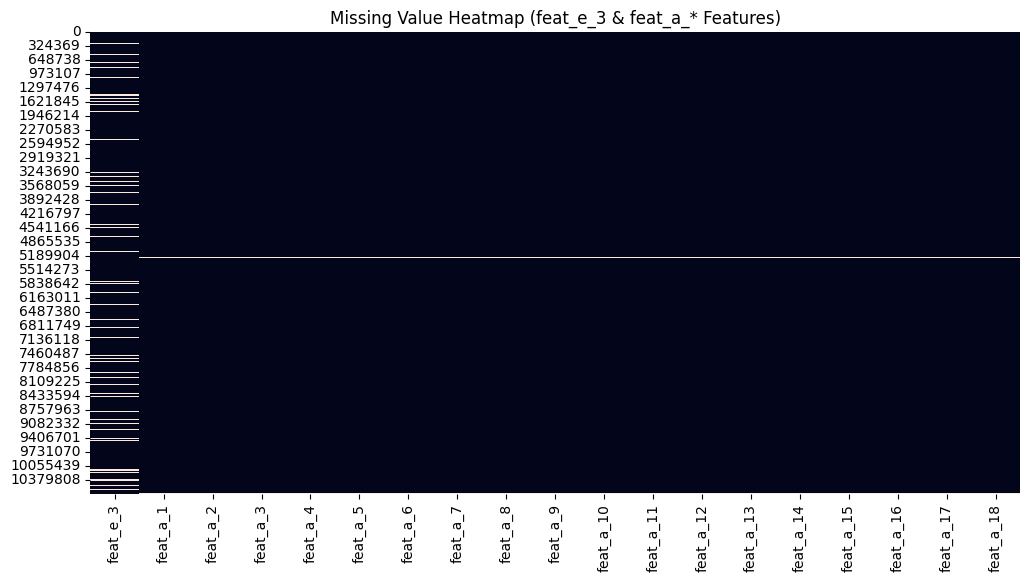

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(train[['feat_e_3'] + [c for c in train.columns if 'feat_a_' in c]].isnull(),
            cbar=False)
plt.title('Missing Value Heatmap (feat_e_3 & feat_a_* Features)')
plt.show()


In [12]:
# 결측 flag 추가
train['feat_e_3_isna'] = train['feat_e_3'].isnull().astype(int)
test['feat_e_3_isna'] = test['feat_e_3'].isnull().astype(int)

# 연령대별 중앙값으로 결측 대체
train['feat_e_3'] = train.groupby('age_group')['feat_e_3'].transform(lambda x: x.fillna(x.median()))
test['feat_e_3'] = test.groupby('age_group')['feat_e_3'].transform(lambda x: x.fillna(x.median()))


In [13]:
# 1. 결측치가 모두 제거됐는지 확인
print("Train 결측:", train['feat_e_3'].isnull().sum())
print("Test 결측:", test['feat_e_3'].isnull().sum())

# 2. flag 값 확인 (0/1 비율)
print(train['feat_e_3_isna'].value_counts(normalize=True))
print(test['feat_e_3_isna'].value_counts(normalize=True))

Train 결측: 17197
Test 결측: 936
feat_e_3_isna
0    0.898586
1    0.101414
Name: proportion, dtype: float64
feat_e_3_isna
0    0.940173
1    0.059827
Name: proportion, dtype: float64


In [14]:
# train/test 전체 중앙값 계산
global_median = train['feat_e_3'].median()

# 남은 결측 전역 중앙값으로 대체
train['feat_e_3'] = train['feat_e_3'].fillna(global_median)
test['feat_e_3'] = test['feat_e_3'].fillna(global_median)

# 최종 검증
print("Train 결측:", train['feat_e_3'].isnull().sum())
print("Test 결측:", test['feat_e_3'].isnull().sum())


Train 결측: 0
Test 결측: 0


In [15]:
# 1. 공통 컬럼만 추출
common_cols = train.columns.intersection(test.columns)

# 2. 각 데이터의 dtype 비교
train_types = train[common_cols].dtypes
test_types = test[common_cols].dtypes

# 3. 서로 다른 dtype만 확인
type_diff = train_types[train_types != test_types]

print("타입 불일치 컬럼 수:", len(type_diff))
display(type_diff)


타입 불일치 컬럼 수: 0


Series([], dtype: object)

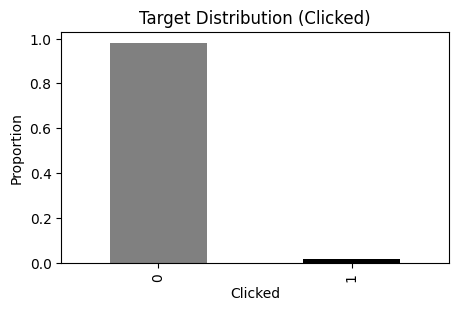

In [16]:
# Target 분포
plt.figure(figsize=(5,3))
train['clicked'].value_counts(normalize=True).plot(kind='bar', color=['gray', 'black'])
plt.title('Target Distribution (Clicked)')
plt.xlabel('Clicked')
plt.ylabel('Proportion')
plt.show()

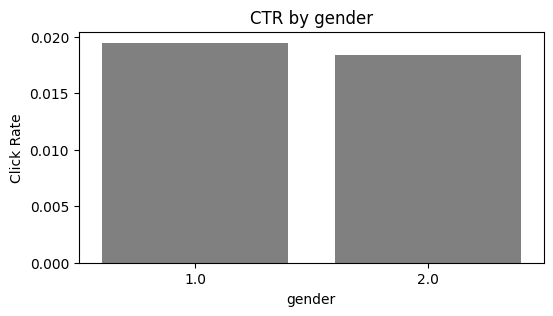

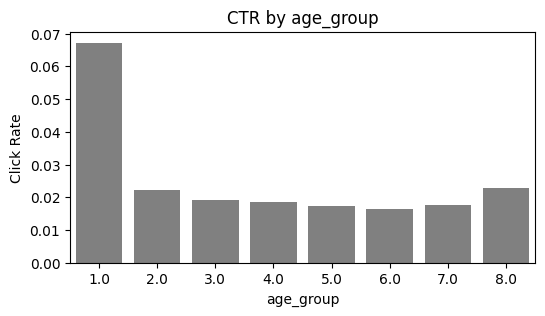

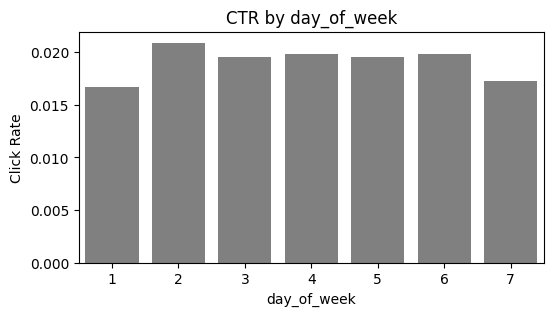

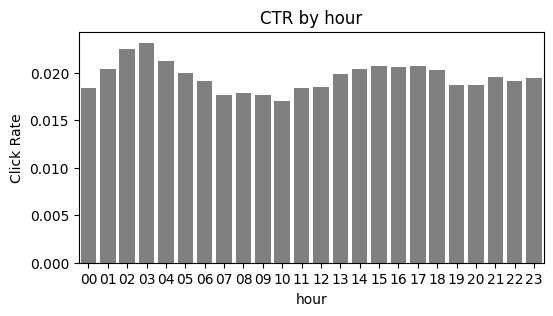

In [17]:
cat_features = ['gender', 'age_group', 'day_of_week', 'hour']

for col in cat_features:
    plt.figure(figsize=(6,3))
    click_rate = train.groupby(col)['clicked'].mean()
    sns.barplot(x=click_rate.index, y=click_rate.values, color='gray')
    plt.title(f'CTR by {col}')
    plt.ylabel('Click Rate')
    plt.xlabel(col)
    plt.show()

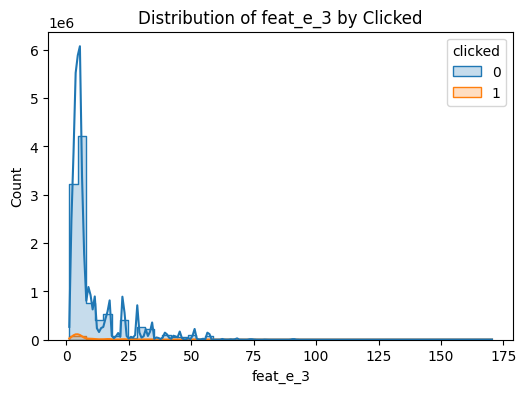

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data=train, x='feat_e_3', hue='clicked', bins=50, kde=True, element='step')
plt.title('Distribution of feat_e_3 by Clicked')
plt.xlabel('feat_e_3')
plt.ylabel('Count')
plt.show()


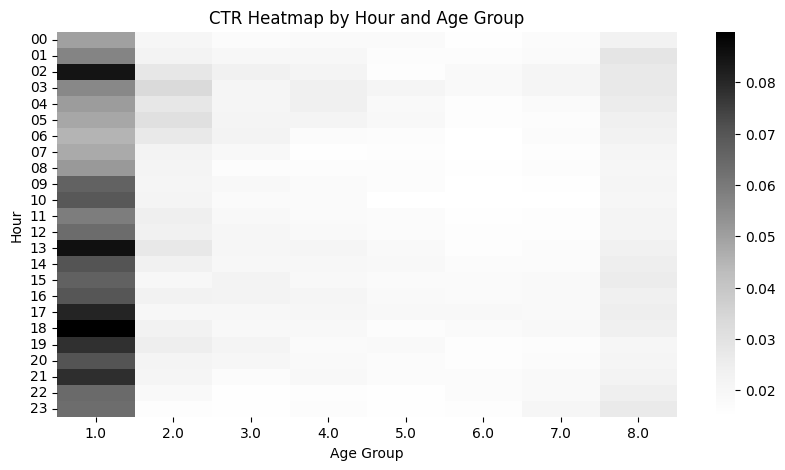

In [19]:
pivot_ct = train.pivot_table(index='hour', columns='age_group', values='clicked', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(pivot_ct, annot=False, cmap='Greys')
plt.title('CTR Heatmap by Hour and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hour')
plt.show()


In [20]:
ctr_inventory = train.groupby('inventory_id')['clicked'].mean().sort_values(ascending=False)
ctr_inventory.head(10), ctr_inventory.tail(10)

(inventory_id
 92    0.059376
 21    0.057634
 88    0.038336
 41    0.036165
 37    0.029917
 91    0.027239
 31    0.022956
 42    0.022155
 29    0.021260
 95    0.019376
 Name: clicked, dtype: float64,
 inventory_id
 29    0.021260
 95    0.019376
 39    0.017519
 19    0.016391
 46    0.016152
 43    0.015439
 36    0.015129
 11    0.011106
 2     0.008787
 8     0.007070
 Name: clicked, dtype: float64)

<Axes: xlabel='seq_length'>

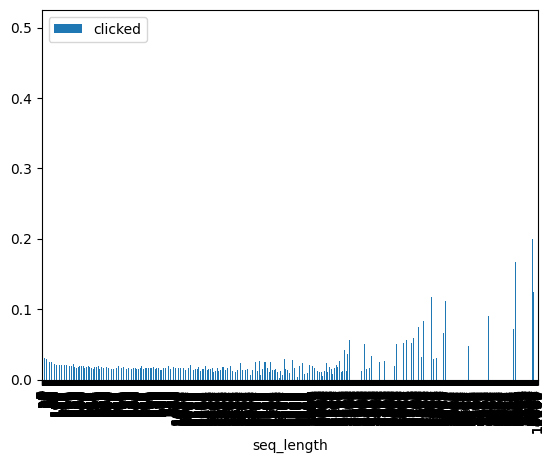

In [21]:
train['seq_length'] = train['seq'].apply(lambda x: len(str(x).split(',')))
train[['seq_length', 'clicked']].groupby('seq_length').mean().plot(kind='bar')

/tmp/ipykernel_2386224/299407330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctr_seq = train.groupby('seq_bin')['clicked'].mean()


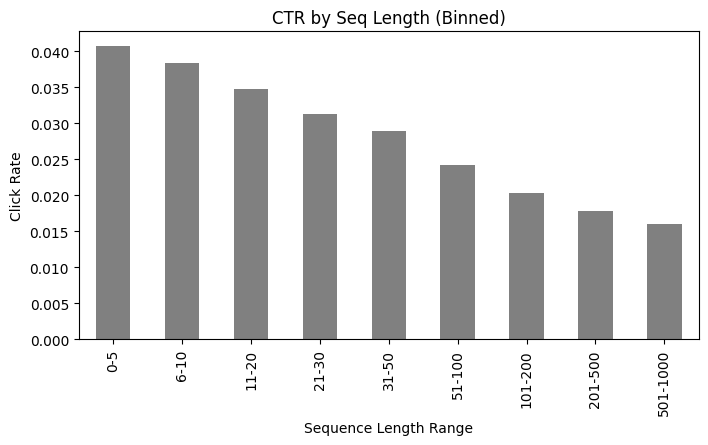

In [22]:
# seq_length 구간화
bins = [0, 5, 10, 20, 30, 50, 100, 200, 500, 1000]
labels = ['0-5','6-10','11-20','21-30','31-50','51-100','101-200','201-500','501-1000']
train['seq_bin'] = pd.cut(train['seq_length'], bins=bins, labels=labels, include_lowest=True)

# 구간별 CTR
ctr_seq = train.groupby('seq_bin')['clicked'].mean()

# 시각화
ctr_seq.plot(kind='bar', figsize=(8,4), color='gray', title='CTR by Seq Length (Binned)')
plt.ylabel('Click Rate')
plt.xlabel('Sequence Length Range')
plt.show()

In [23]:
ctr_ads = train.groupby('l_feat_14')['clicked'].mean().sort_values(ascending=False)

In [24]:
train['l_feat_14'].isnull().mean()
train['l_feat_14'].nunique()

3237

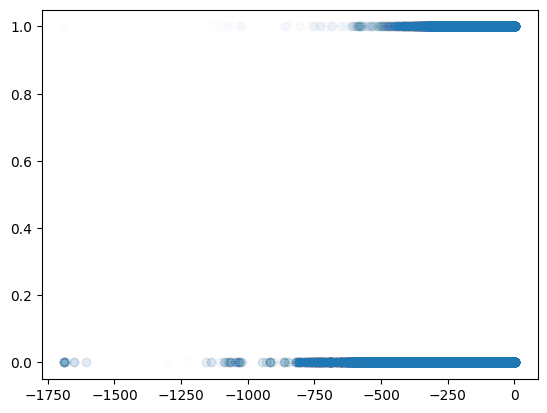

In [25]:
hist_cols = [c for c in train.columns if 'history_a_' in c]
train['history_mean'] = train[hist_cols].mean(axis=1)
plt.scatter(train['history_mean'], train['clicked'], alpha=0.01)

In [26]:
# =========================
save_train_path = os.path.join(BASE_DIR, "train_basic.parquet")
save_test_path = os.path.join(BASE_DIR, "test_basic.parquet")

train.to_parquet(save_train_path, index=False)
test.to_parquet(save_test_path, index=False)

print("✅ 전처리 완료 및 EDA 결과 저장 성공!")
print(f"train_basic.parquet → {save_train_path}")
print(f"test_basic.parquet → {save_test_path}")
print("train shape:", train.shape)
print("test shape:", test.shape)

✅ 전처리 완료 및 EDA 결과 저장 성공!
train_basic.parquet → ./train_basic.parquet
test_basic.parquet → ./test_basic.parquet
train shape: (10704168, 123)
test shape: (1527298, 120)
